In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_dataframe(filename):
    df = pd.read_csv(filename)
    
    # マーカーが初めてセットされた位置を見つける
    marker_set = np.where(df['Marker'] != 0)[0]
    if len(marker_set) > 0:
        first_marker = marker_set[0]
    else:
        first_marker = 0

    # マーカーがセットされた位置に対する時間を計算し、新しい列として追加
    df['time'] = (df.index - first_marker) / 256  # データ収集レートを考慮

    return df

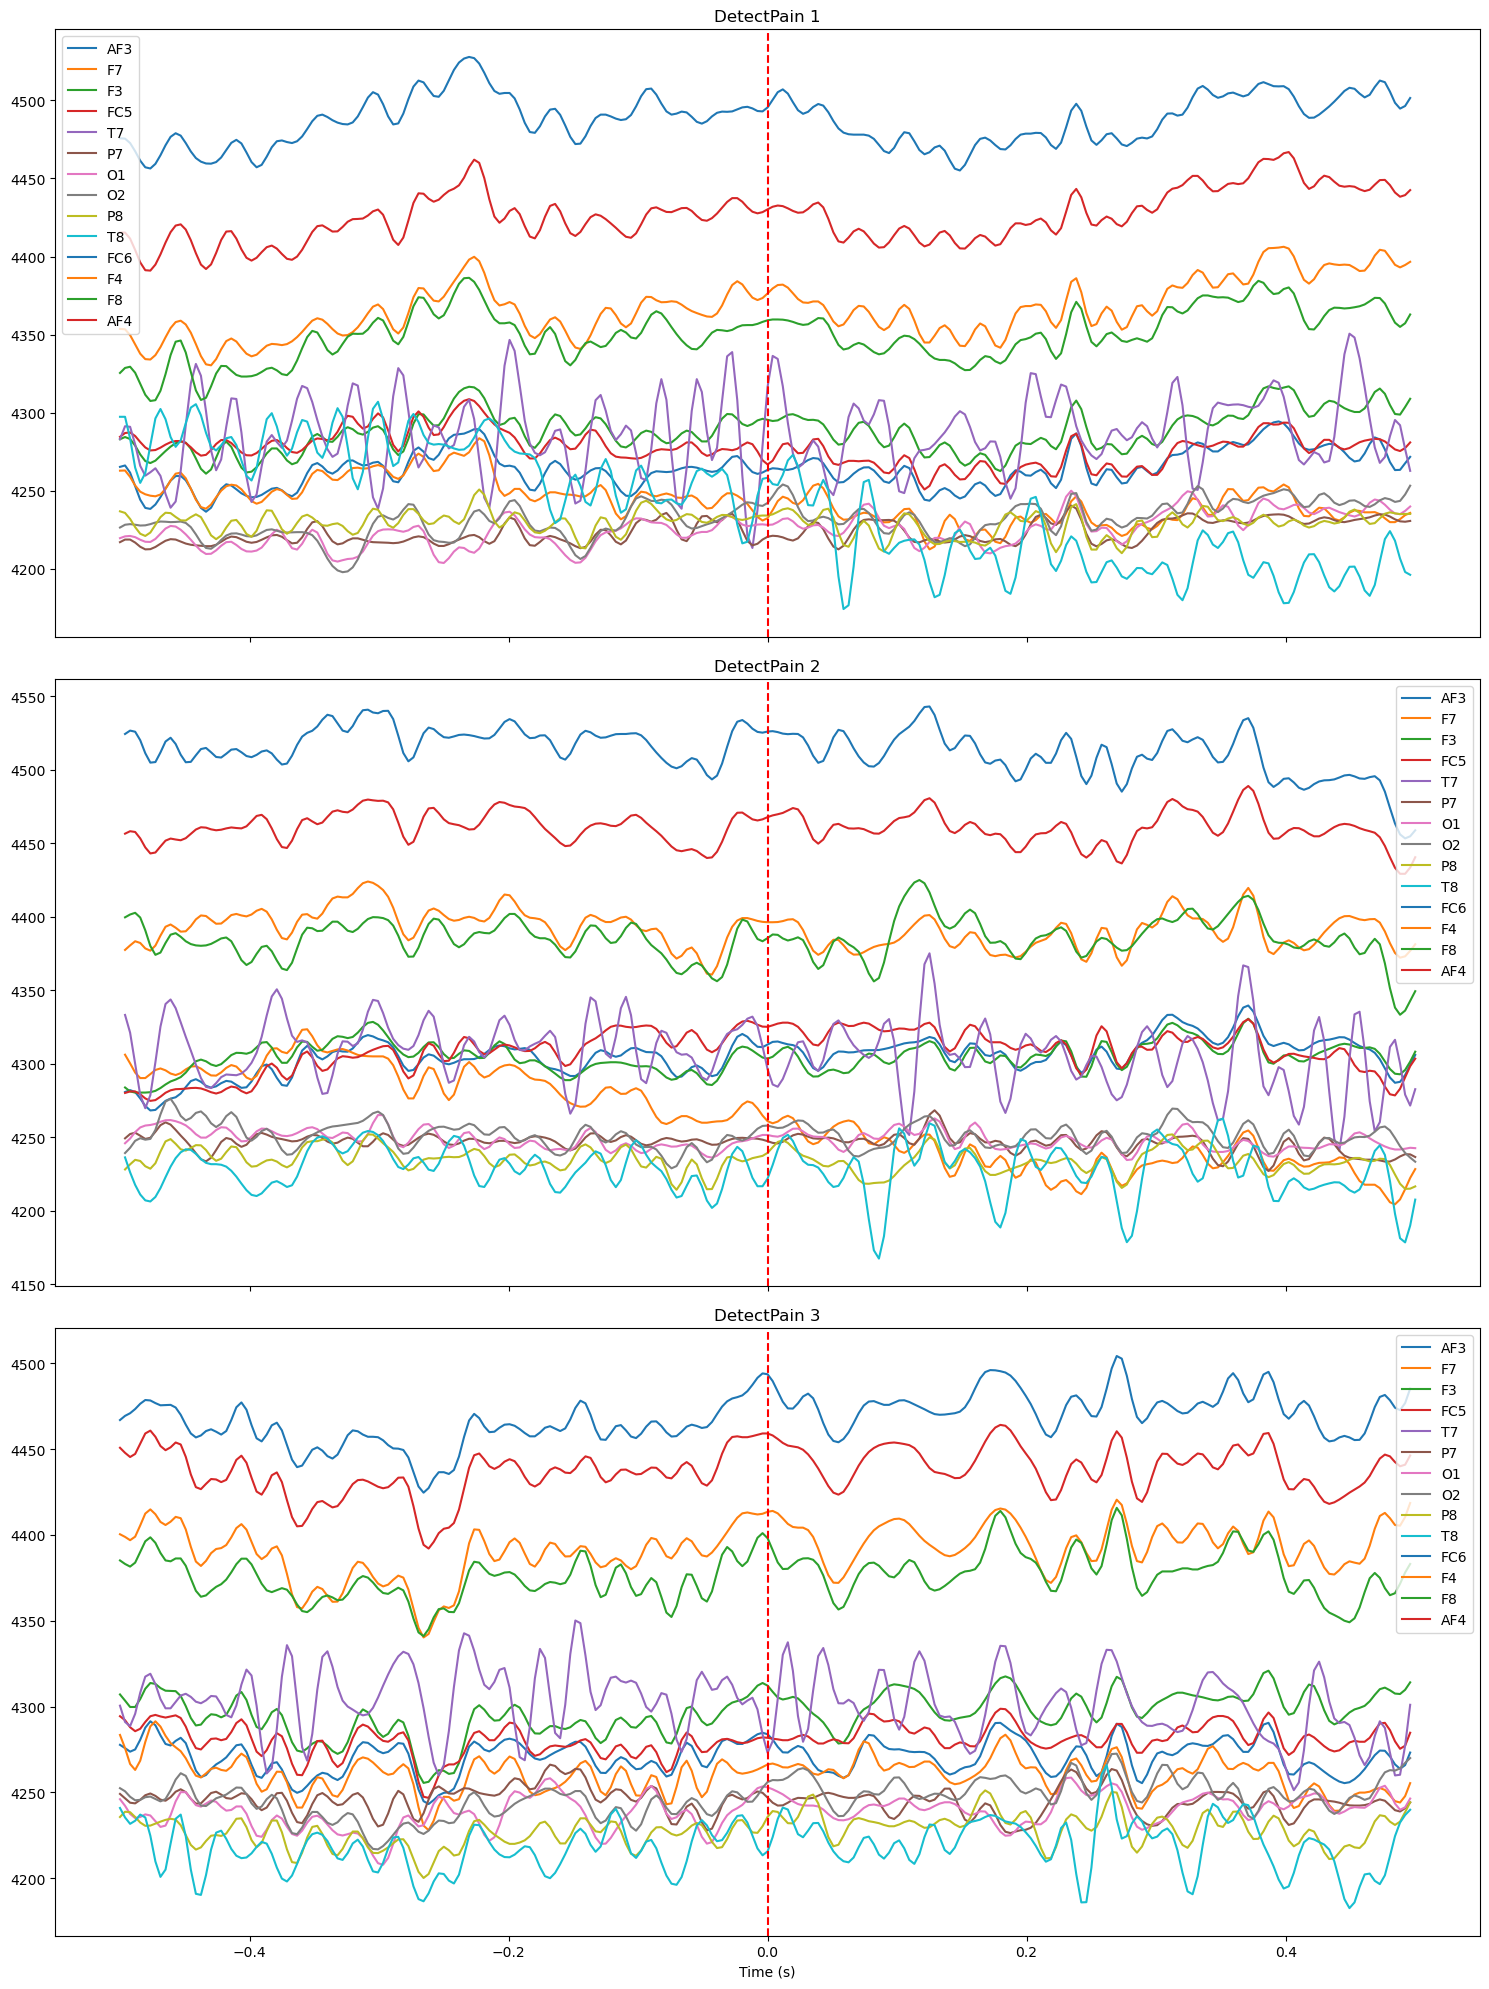

In [12]:
# 各CSVファイルのデータフレームを処理
df1 = process_dataframe('DP_+-05_1.csv')
df2 = process_dataframe('DP_+-05_2.csv')
df3 = process_dataframe('DP_+-05_3.csv')

# チャネル名
channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

# プロット
fig, axs = plt.subplots(3, 1, figsize=(15, 20), sharex=True)

for ch in channels:
    axs[0].plot(df1['time'], df1[ch], label=ch)
axs[0].axvline(x=0, color='r', linestyle='--')
axs[0].legend()
axs[0].set_title('DetectPain 1')

for ch in channels:
    axs[1].plot(df2['time'], df2[ch], label=ch)
axs[1].axvline(x=0, color='r', linestyle='--')
axs[1].legend()
axs[1].set_title('DetectPain 2')

for ch in channels:
    axs[2].plot(df3['time'], df3[ch], label=ch)
axs[2].axvline(x=0, color='r', linestyle='--')
axs[2].legend()
axs[2].set_title('DetectPain 3')

plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()